/lab/drowsy/drowsy_eeg_eog/independent_reconstruct_phase_space.ipynb

0106 --> 辞書データの作成 --> 学習用データセットの作成 --> 普通のCNN (訓練と評価)

# 0106

## 辞書データの作成

/Users/tk/Documents/法政大学/lab/drowsy/drowsy_eeg_eog/independent_project/need_utils.py:9: UserWarning: A NumPy version >=1.23.5 and <2.3.0 is required for this version of SciPy (detected version 1.23.0)
  from scipy.signal import butter, filtfilt


チャンネル:  EOG-V
----------------------------------------
バンドパスフィルタ:  0.5 - 70.0 Hz
標準化しました。
正規化しました。
----------------------------------------


0it [00:00, ?it/s]

12-1 をキーに追加しました
10-1 をキーに追加しました
8-1 をキーに追加しました
13-2 をキーに追加しました
5-1 をキーに追加しました
1-1 をキーに追加しました
3-2 をキーに追加しました


1it [00:00,  3.01it/s]

3-1 をキーに追加しました
6-2 をキーに追加しました
6-1 をキーに追加しました
2-1 をキーに追加しました
10-3 をキーに追加しました
8-3 をキーに追加しました
14-3 をキーに追加しました
14-2 をキーに追加しました
11-2 をキーに追加しました
11-3 をキーに追加しました
9-3 をキーに追加しました
5-3 をキーに追加しました
5-2 をキーに追加しました
7-3 をキーに追加しました


2it [00:00,  2.48it/s]

1-3 をキーに追加しました
6-3 をキーに追加しました
4-3 をキーに追加しました
4-2 をキーに追加しました
2-2 をキーに追加しました
----------------------------------------
ウィンドウ: 13秒, スライド: 1秒でデータのセグメンテーションが完了しました。
----------------------------------------
データがセグメントされた辞書: split_data_dic
ラベルの取り出し例: label = list(split_data_dic["1-1"])
データの取り出し例: data = split_data_dic["1-1"][label]
セグメントされた行列データ形状:  (588, 6656)
----------------------------------------
セグメントされたデータの取り出しが完了しました。
セグメントされたデータの形状:  (588, 6656)


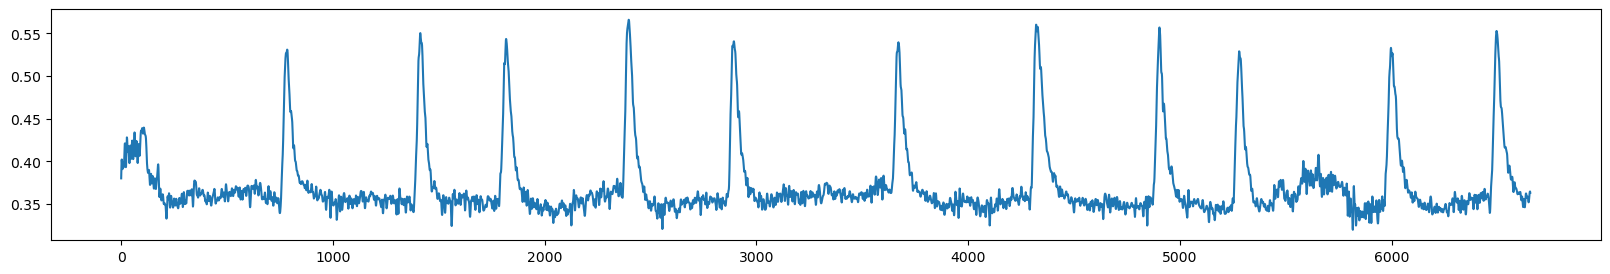

In [2]:
# 辞書データの作成
import sys
sys.path.append('./independent_project')  # ライブラリのファイルがあるディレクトリを追加
import load_data, preprocessing, need_utils
import numpy as np


CHANNEL = "EOG-V"
print("チャンネル: ", CHANNEL)

WINDOW_SEC = 13  # 分割するウィンドウサイズ（秒）
OVER_SEC = 12
SLIDE_SEC = WINDOW_SEC - OVER_SEC  # スライドする時間（秒）

# EMGの有効周波数帯は0-500Hzなのでバンドパスフィルタはかけない
BANDPASS = True  # True: バンドパスフィルタをかける / False: バンドパスフィルタをかけない
FS = 512
LOWCUT = 0.5
HIGHCUT = 70.0

STANDARDIZATION = True
NORMALIZATION = True
REMOVE_OUTLIERS = False

DOWNSAMPLING = False  # True: ダウンサンプリングを行う / False: ダウンサンプリングを行わない
FR = 64
CUTOFF = FR/2


# 適用した前処理の表示
print("----------------------------------------")
if BANDPASS:
    print("バンドパスフィルタ: ", f"{LOWCUT} - {HIGHCUT} Hz")
if STANDARDIZATION:
    print("標準化しました。")
if NORMALIZATION:
    print("正規化しました。")
if REMOVE_OUTLIERS:
    print("外れ値除去しました。")
if DOWNSAMPLING:
    print("ダウンサンプリングしました。")
    print("ダウンサンプリング後のサンプリング周波数: ", FR, "Hz")
print("----------------------------------------")


# 被験者の実験データを辞書に格納
data_dic = load_data.create_dataset_for_independent(CHANNEL, BANDPASS, FS, LOWCUT, HIGHCUT, STANDARDIZATION, NORMALIZATION, REMOVE_OUTLIERS, DOWNSAMPLING, CUTOFF, FR, WINDOW_SEC, OVER_SEC)


# 被験者のデータリスト
subj_list = [
    "1-1", "1-3",
    "2-1", "2-2",
    "3-1", "3-2",
    "4-2", "4-3",
    "5-1", "5-2", "5-3",
    "6-1", "6-2", "6-3",
    "7-3",
    "8-1", "8-3",
    "9-3",
    "10-1", "10-3",
    "11-2", "11-3",
    "12-1",
    "13-2",
    "14-2", "14-3"
]



# 辞書内データのセグメンテーション
split_data_dic = preprocessing.split_data_by_subject(data_dic, WINDOW_SEC, SLIDE_SEC)  # 辞書内のデータを分割
print("----------------------------------------")
print("データがセグメントされた辞書: split_data_dic")
print("ラベルの取り出し例: label = list(split_data_dic[\"1-1\"])")  # ラベルの取り出し例
print("データの取り出し例: data = split_data_dic[\"1-1\"][label]")  # データの取り出し例
print("セグメントされた行列データ形状: ", np.array(list(split_data_dic["1-1"].values())[0]).shape)  # 分割されたデータの形状を表示



# セグメントされたデータの取り出し（例）
segments = need_utils.get_segments_from_split_data(split_data_dic, "1-1")
print("セグメントされたデータの形状: ", segments.shape)  # セグメントされたデータの形状を表示 --> (セグメント数, サンプル数)


import matplotlib.pyplot as plt
plt.figure(figsize=(20, 3))
plt.plot(segments[0])
plt.show()


## 学習用データセットの作成

ラベルへのアクセス例: label = list(split_data_dic["1-1"].keys())[0] -->  0
セグメントされたデータへのアクセス例: signal = np.array(split_data_dic["1-1"][label][0]) -->  (6656,)
----------------------------------------
テスト被験者:  ['9-3']
セグメントの形状: (実験数, セグメント数, サンプル数)
訓練データセグメント:  (25, 588, 6656)
訓練ラベルセグメント:  (25, 588)
テストデータセグメント:  (1, 588, 6656)
テストラベルセグメント:  (1, 588)
----------------------------------------
リシェイプ後の形状: (セグメント数, サンプル数)
訓練データセグメント:  (14700, 6656)
訓練ラベルセグメント:  (14700,)
テストデータセグメント:  (588, 6656)
テストラベルセグメント:  (588,)


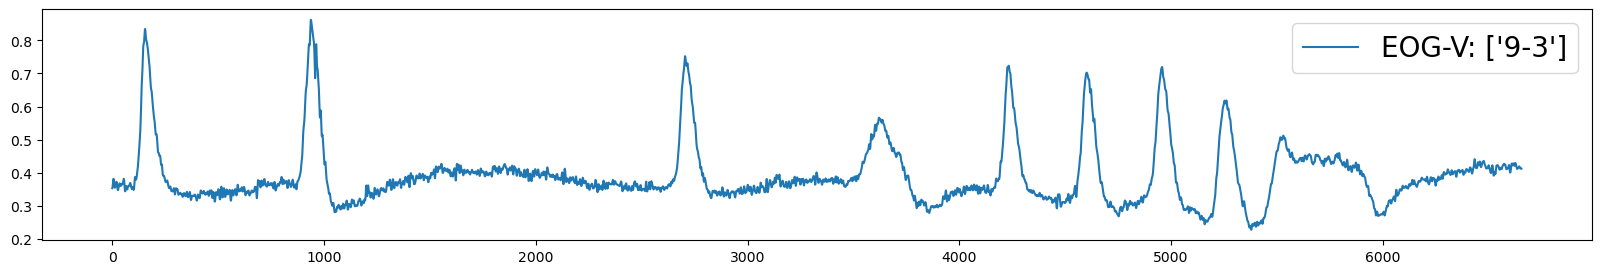

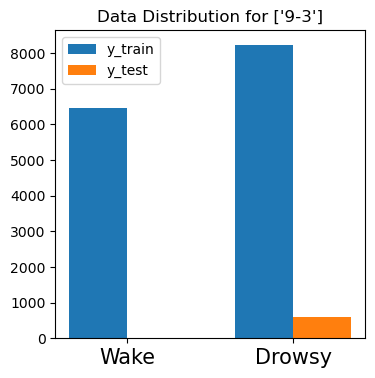

In [4]:
# 学習用データセットの作成
import pandas as pd

label = list(split_data_dic["1-1"].keys())[0]  # ラベルへのアクセス例
signal = np.array(split_data_dic["1-1"][label][0])  # セグメントされたデータへのアクセス例
print("ラベルへのアクセス例: label = list(split_data_dic[\"1-1\"].keys())[0] --> ", label)
print("セグメントされたデータへのアクセス例: signal = np.array(split_data_dic[\"1-1\"][label][0]) --> ", signal.shape)
print("----------------------------------------")


# 訓練データとテストデータの作成
# test_subj_list = ["1-1", "1-3"]  # テストデータの被験者リスト
# test_subj_list = ["2-1", "2-2"]  # テストデータの被験者リスト
# test_subj_list = ["3-1", "3-2"]
# test_subj_list = ["4-2", "4-3"]
# test_subj_list = ["5-1", "5-2", "5-3"]
# test_subj_list = ["6-1", "6-2", "6-3"]
# test_subj_list = ["7-3"]
# test_subj_list = ["8-1", "8-3"]
test_subj_list = ["9-3"]
# test_subj_list = ["10-1", "10-3"]
# test_subj_list = ["11-2", "11-3"]
# test_subj_list = ["12-1"]
# test_subj_list = ["13-2"]
# test_subj_list = ["14-2", "14-3"]
print("テスト被験者: ", test_subj_list)


# 訓練データとテストデータの作成
X_train_segments, y_train_segments, X_test_segments, y_test_segments = need_utils.make_train_test_dataset(split_data_dic, test_subj_list)
"""
セグメントの形状: (実験数, セグメント数, サンプル数)
訓練データセグメント:  (25, 588, 6656)
訓練ラベルセグメント:  (25, 588)
テストデータセグメント:  (1, 588, 6656)
テストラベルセグメント:  (1, 588)
"""

sample_num = X_train_segments.shape[-1]  # X_train_segmentsの形状変更のためにデータポイント数をとる


# 訓練データとテストデータの形状変更
X_train, y_train, X_test, y_test = X_train_segments.reshape(-1, sample_num), y_train_segments.reshape(-1), X_test_segments.reshape(-1, sample_num), y_test_segments.reshape(-1)
print("----------------------------------------")
print("リシェイプ後の形状: (セグメント数, サンプル数)")
print("訓練データセグメント: ", X_train.shape)
print("訓練ラベルセグメント: ", y_train.shape)
print("テストデータセグメント: ", X_test.shape)
print("テストラベルセグメント: ", y_test.shape)


# ラベルごとのデータ数をカウント
y_train_value_counts = pd.Series(y_train).value_counts()
y_test_value_counts = pd.Series(y_test).value_counts()


# テストデータの信号を可視化
plt.figure(figsize=(20, 3))
plt.plot(X_test[100], label=f"{CHANNEL}: {test_subj_list}")
plt.legend(fontsize=20)
plt.show()


# Create bar plots
fig, ax = plt.subplots(figsize=(4, 4))
width = 0.35  # Width of the bars
# Plot y_train value counts
ax.bar(y_train_value_counts.index - width/2, y_train_value_counts, width, label='y_train')
# Plot y_test value counts
ax.bar(y_test_value_counts.index + width/2, y_test_value_counts, width, label='y_test')
# Add labels and title
# ax.set_xlabel('Label', fontsize=10)
# ax.set_ylabel('Count', fontsize=10)
ax.set_xticks([0, 1])
ax.set_xticklabels(['Wake', 'Drowsy'], fontsize=15)
ax.set_title(f'Data Distribution for {test_subj_list}')
ax.legend()
# Show plot
plt.show()

## 普通のCNN

---------------------------------------------
テスト被験者:  ['9-3']
---------------------------------------------
X_train:  (14700, 6656)
y_train:  (14700,)
X_test:  (588, 6656)
y_test:  (588,)
---------------------------------------------
y_trainのラベル分布: 
1    8232
0    6468
dtype: int64
y_testのラベル分布: 
1    588
dtype: int64


Validation: 100%|██████████| 10/10 [00:00<00:00, 47.04it/s]


Epoch 1, Loss: 0.4376, Train Accuracy: 0.8133, Val Accuracy: 0.6973


Validation: 100%|██████████| 10/10 [00:00<00:00, 101.64it/s]


Epoch 2, Loss: 0.2951, Train Accuracy: 0.9153, Val Accuracy: 0.7313


Validation: 100%|██████████| 10/10 [00:00<00:00, 106.87it/s]


Epoch 3, Loss: 0.2365, Train Accuracy: 0.9333, Val Accuracy: 0.5952


Validation: 100%|██████████| 10/10 [00:00<00:00, 101.20it/s]


Epoch 4, Loss: 0.2068, Train Accuracy: 0.9406, Val Accuracy: 0.6752


Validation: 100%|██████████| 10/10 [00:00<00:00, 104.18it/s]


Epoch 5, Loss: 0.1848, Train Accuracy: 0.9465, Val Accuracy: 0.3163


Validation: 100%|██████████| 10/10 [00:00<00:00, 106.26it/s]


Epoch 6, Loss: 0.1662, Train Accuracy: 0.9503, Val Accuracy: 0.3061


Validation: 100%|██████████| 10/10 [00:00<00:00, 109.91it/s]


Epoch 7, Loss: 0.1503, Train Accuracy: 0.9586, Val Accuracy: 0.3639


Validation: 100%|██████████| 10/10 [00:00<00:00, 99.09it/s]


Epoch 8, Loss: 0.1417, Train Accuracy: 0.9612, Val Accuracy: 0.4524


Validation: 100%|██████████| 10/10 [00:00<00:00, 105.52it/s]


Epoch 9, Loss: 0.1328, Train Accuracy: 0.9650, Val Accuracy: 0.2789


Validation: 100%|██████████| 10/10 [00:00<00:00, 110.83it/s]


Epoch 10, Loss: 0.1263, Train Accuracy: 0.9666, Val Accuracy: 0.2347


Validation: 100%|██████████| 10/10 [00:00<00:00, 58.23it/s]


-----------------------------------------
LOSO検証精度:  0.23469387755102042
パラメータをjsonファイルに保存:  {'./results/independent/EOG-V/params.json'}


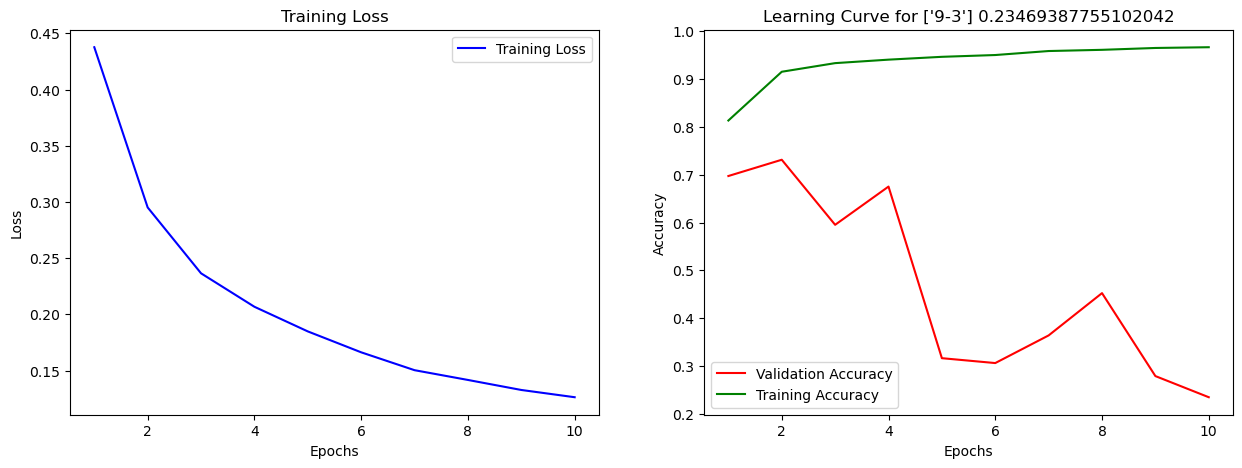

In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm
import scipy.signal
import matplotlib.pyplot as plt

from plyer import notification
import pandas as pd
import os
os.environ["PYTORCH_ENABLE_MPS_FALLBACK"] = "1"

class PhysiologicalSignalDataset(Dataset):
    def __init__(self, signals, labels):
        """
        Args:
            signals (np.array): Shape (N, C, L) - N:サンプル数, C:チャンネル数, L:信号長
            labels (np.array): Shape (N,) - 0:覚醒, 1:眠気
        """
        self.signals = torch.FloatTensor(signals)
        self.labels = torch.LongTensor(labels)

        if self.signals.dim() == 2:
            self.signals = self.signals.unsqueeze(1)  # 1チャンネルの場合は、チャンネル次元の追加 --> (バッチ、チャンネル、データポイント)
        
    def __len__(self):
        return len(self.signals)
    
    def __getitem__(self, idx):
        return self.signals[idx], self.labels[idx]


class CNN(nn.Module):
    def __init__(self, in_channels, num_classes):
        super().__init__()
        self.conv1 = nn.Conv1d(in_channels, 32, kernel_size=15, stride=3)
        self.bn1 = nn.BatchNorm1d(32)
        self.pool1 = nn.MaxPool1d(kernel_size=9, stride=2)
        self.conv2 = nn.Conv1d(32, 64, kernel_size=15, stride=3)
        self.bn2 = nn.BatchNorm1d(64)
        self.pool2 = nn.MaxPool1d(kernel_size=9, stride=2)
        self.conv3 = nn.Conv1d(64, 128, kernel_size=15, stride=3)
        self.bn3 = nn.BatchNorm1d(128)
        self.pool3 = nn.MaxPool1d(kernel_size=9, stride=3)
        self.fc = nn.Linear(128, num_classes) # 全結合層

    def forward(self, x):
        x = self.pool1(F.relu(self.bn1(self.conv1(x))))
        x = self.pool2(F.relu(self.bn2(self.conv2(x))))
        x = self.pool3(F.relu(self.bn3(self.conv3(x))))
        x = torch.mean(x, dim=2) # Global Average Pooling
        x = self.fc(x)
        return x

def train_epoch(model, train_loader, optimizer, criterion, device):
    model.train()
    total_loss = 0
    correct = 0
    total_samples = 0
    for signals, labels in tqdm(train_loader, desc="Training"):
        signals = signals.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        outputs = model(signals)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_samples += labels.size(0)
        correct += (predicted == labels).sum().item()
    train_accuracy = correct / total_samples
    return total_loss / len(train_loader), train_accuracy

def evaluate(model, val_loader, device):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for signals, labels in tqdm(val_loader, desc="Validation"):
            signals = signals.to(device)
            labels = labels.to(device)
            outputs = model(signals)
            _, predicted = torch.max(outputs.data, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)
    return correct / total


def main():
    # ハイパーパラメータ
    batch_size = 64
    num_epochs = 10
    learning_rate = 0.00001
    in_channels = 1
    num_classes = 2 # 覚醒と眠気の2クラス

    device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
    # モデルの初期化
    model = CNN(in_channels=in_channels, num_classes=num_classes).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    criterion = nn.CrossEntropyLoss() # 交差エントロピー損失を使用

    # テスト被験者
    print("---------------------------------------------")
    print("テスト被験者: ", test_subj_list)

    # データの読み込みと前処理
    # ... (データの読み込みコード)
    print("---------------------------------------------")
    print("X_train: ", X_train.shape)
    print("y_train: ", y_train.shape)
    print("X_test: ", X_test.shape)
    print("y_test: ", y_test.shape)

    # 各値の出現回数を数える
    y_train_value_counts = pd.Series(y_train).value_counts()
    y_test_value_counts = pd.Series(y_test).value_counts()
    print("---------------------------------------------")
    print("y_trainのラベル分布: ") 
    print(y_train_value_counts)
    print("y_testのラベル分布: ")
    print(y_test_value_counts)

    train_dataset = PhysiologicalSignalDataset(X_train, y_train)
    val_dataset = PhysiologicalSignalDataset(X_test, y_test)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

    train_losses = []
    val_accuracies = []
    train_accuracies = []

    for epoch in range(num_epochs):
        train_loss, train_accuracy = train_epoch(model, train_loader, optimizer, criterion, device)
        val_accuracy = evaluate(model, val_loader, device)

        train_losses.append(train_loss)
        train_accuracies.append(train_accuracy)
        val_accuracies.append(val_accuracy)

        print(f'Epoch {epoch+1}, Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Val Accuracy: {val_accuracy:.4f}')
    
    val_accuracy = evaluate(model, val_loader, device)
    print("-----------------------------------------")
    print("LOSO検証精度: ", val_accuracy)

    # 訓練損失と検証精度のプロット
    epochs = range(1, num_epochs + 1)
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, 'b-', label='Training Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, val_accuracies, 'r-', label='Validation Accuracy')
    plt.plot(epochs, train_accuracies, 'g-', label='Training Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'Learning Curve for {test_subj_list} {val_accuracy}')
    plt.legend()

    # プロットの保存
    save_dir = f"./results/independent/{CHANNEL}"
    os.makedirs(save_dir, exist_ok=True)
    # ファイル名を文字列に変換
    file_name = "_".join(test_subj_list)
    # 画像を保存
    plt.savefig(os.path.join(save_dir, f"{file_name}.png"))


    # モデルのパラメータを辞書形式に変換
    model_dict = {k: v.tolist() for k, v in model.state_dict().items()}

    import json
    # Parameters
    params = {
        "CHANNEL": CHANNEL,
        "WINDOW_SEC": WINDOW_SEC,
        "OVER_SEC": OVER_SEC,
        "SLIDE_SEC": WINDOW_SEC - OVER_SEC,
        "BANDPASS": True,
        "FS": FS,
        "LOWCUT": LOWCUT,
        "HIGHCUT": HIGHCUT,
        "STANDARDIZATION": STANDARDIZATION,
        "NORMALIZATION": NORMALIZATION,
        "REMOVE_OUTLIERS": REMOVE_OUTLIERS,
        "DOWNSAMPLING": DOWNSAMPLING,
        "FR": FR,
        "CUTOFF": FR/2,
        "batch_size": batch_size,
        "num_epochs": num_epochs,
        "learning_rate": learning_rate,
        "in_channels": in_channels,
        "num_classes": num_classes,
        "model_dict": model_dict,
    } 

    # Save to JSON file
    save_path = os.path.join(save_dir, "params.json")
    with open(save_path, 'w') as json_file:
        json.dump(params, json_file, indent=4)

    print(f"パラメータをjsonファイルに保存: ", {save_path})

    # 学習が終わったら通知を送る
    os.system(f"""
            osascript -e 'display notification "モデルの学習が完了しました ({val_accuracy})" with title "学習通知" sound name "Glass"'
            """)


if __name__ == "__main__":
    main()
